In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
diabetes_df = pd.read_csv(r'C:\Users\sabri\Documents\NSS DA13\Capstone\diabetes-capstone\data\diabetic_data.csv')

In [37]:
ids_map_df = pd.read_csv(r'C:\Users\sabri\Documents\NSS DA13\Capstone\diabetes-capstone\data\IDS_mapping.csv')

In [39]:
diabetes_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [41]:
print(diabetes_df.head(5))

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [23]:
print(diabetes_df.tail(5))

   admission_type_id                                        description
62                22   Transfer from hospital inpt/same fac reslt in...
63                23                          Born inside this hospital
64                24                         Born outside this hospital
65                25            Transfer from Ambulatory Surgery Center
66                26                              Transfer from Hospice


In [45]:
diabetes_df.duplicated().sum()

0

In [47]:
diabetes_df.shape

(101766, 50)

In [49]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [51]:
diabetes_df.isnull().sum()

#NOTE: most of records have nulls in max_glu_serum and A1Cresult columns
#Dtypes for both columns = object

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [59]:
#QUESTION: how to handle these 2 columns? Keep as obj. or convert dtype?**

#Replace NaN values for columns in accordance w/ distribution:
diabetes_df['max_glu_serum'].fillna(diabetes_df['max_glu_serum'].mean(), inplace=True)
diabetes_df['A1Cresult'].fillna(diabetes_df['A1Cresult'].mean(), inplace=True)

#Check nulls again:
diabetes_df.isnull().sum()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [84]:
#Check Summary Stats of numerical data:
diabetes_df.describe()

#NOTE: ignore any id columns (8 columns usable)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,quest_mark_count
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,1.895024
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.705472
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,1.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,2.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,2.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,5.000000


In [72]:
#Count how many times "?" string occurs:
diabetes_df['quest_mark_count'] = diabetes_df.apply(lambda x: sum([i.lower().count('?') for i in x if isinstance(i, str)]), axis=1)


In [74]:
diabetes_df['quest_mark_count'] 

0         4
1         3
2         3
3         3
4         3
         ..
101761    2
101762    2
101763    2
101764    1
101765    3
Name: quest_mark_count, Length: 101766, dtype: int64

In [88]:
no_quest_mark_df = diabetes_df.replace('?' ,np.nan)
no_quest_mark_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,quest_mark_count
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,4
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,3
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,3
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,3
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,2
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,2
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,2
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,1


In [94]:
#no_quest_mark_df['medical_specialty']

0         Pediatrics-Endocrinology
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
101761                         NaN
101762                         NaN
101763                         NaN
101764             Surgery-General
101765                         NaN
Name: medical_specialty, Length: 101766, dtype: object

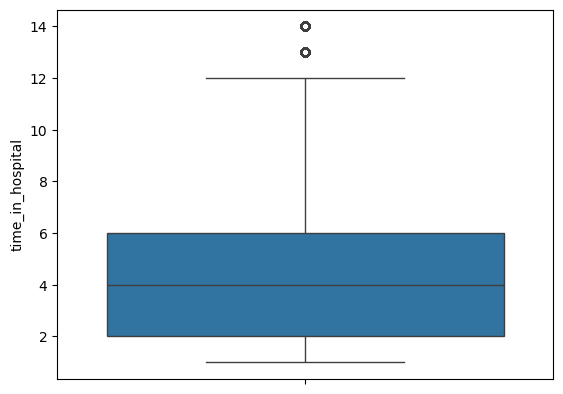

In [98]:
#Visualize and Remove Outliers (Box Plot):

sns.boxplot(no_quest_mark_df['time_in_hospital'])
plt.show()

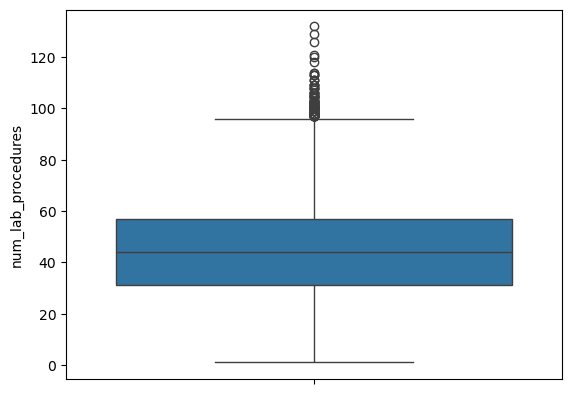

In [102]:
sns.boxplot(no_quest_mark_df['num_lab_procedures'])
plt.show()

In [19]:
ids_map_df

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


# NOTES AND QUESTIONS SUMMARY:

1. Should I create a data dictionary for the columns and mention in READ.me?
- Note specific columns used and what info
3. What should I do about null/missing values? (NOTE: some columns have an entry of "?" so is not included in total .isnull count)
4. Should I convert booleans to 0 and 1 (for "yes"/other boolean option and "no" )

Notes:
- Missing data to access treatment costs of question 2 in proposal
- Need:
   (1) ICD-9 codes data file to identify diag_1, diag_2, diag_3 columns
   (2) Payer codes data
- Look at outliers in any columns (distribution curve)
Missing:
- 882/101766 records for payer_code
- 53 records for race